# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

In [1]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
pd.set_option('max_columns', 50)
import seaborn as sns

### Load the dataset

Load the cleaned dataset.

In [2]:
#your code here

wnba = pd.read_csv('../data/wnba_clean.csv', index_col = 'Unnamed: 0')


# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

In [3]:
# your answer here

# I have to assume that the Weight mean is normally distributed, that the players in the 
# sample were selected randomly and the sample ir representative of the population. 

# I must also calculate the sample mean. 
#I do not know the standard deviation of the population, therefore I have to use 
# its approximation, and consequently t distribution instead of normal one.
# I have to choose the desired confidence level (in this case I can choose 95%).

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

In [4]:
# your code here

from scipy.stats import t

sample_mean = np.mean(wnba['Weight'])
sample_std = np.std(wnba['Weight'])

confint = t.interval(0.95, df = len(wnba)-1, loc = sample_mean, scale = sample_std/len(wnba)**0.5)

print(f'95% confidence interval is {confint}')


95% confidence interval is (77.16104886388014, 80.7966976149931)


**What can you say about these results?**

In [5]:
#your-answer-here

# There is 95% probability that the average weight of WNBA players is between 77 and 80.7kg. 

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

In [6]:
#your-answer-here

# The grandmother is right that my sister is too skinny, but she should know that there is 
# a small number of exceptions.


## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

/usr/local/Cellar/jupyterlab/2.0.1/libexec/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/Cellar/jupyterlab/2.0.1/libexec/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


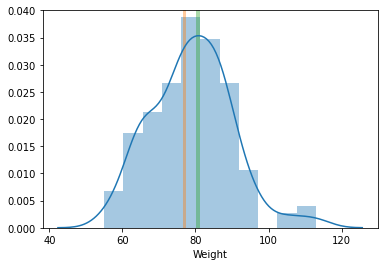

In [7]:
# your code here

sns.distplot(wnba['Weight'])
sns.distplot(77)
sns.distplot(80.7)
plt.ylim(0, 0.04)
plt.show()

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [8]:
# your answer here

# The underlying distribution must have a binary random variable in order to be a binomial 
# distribution.
# The sample proportions p(success) and q(failure) will be estimates of the unknown 
# population proportions p and q.
# The sample should be representative?

wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [9]:
# your code here

# Estimate the percentage of players that fail more than 40% of their free throws

fail_FT = 100 - wnba['FT%']
fail_FT

# Construct confidence interval

n = len(fail_FT)
fail_FT_above40 = [i for i in fail_FT if i > 40]
p = len(fail_FT_above40)/n
se = math.sqrt((p*(1-p)/n))

confint = stats.norm.interval(0.95, loc = p, scale = se)
print(f'95% confidence interval is {confint}')


95% confidence interval is (0.049558988317297346, 0.14762411027425193)


**What can you comment about our result? What would you tell your sister?**

In [10]:
#your-answer-here

# There is  95% probability that the percentage of WNBA players that fail more than 40% of 
# their free throws is between 5.5% and 15.5%, so not the majority. Hence, my sister is 
# not right.

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

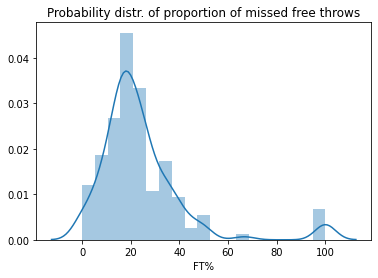

In [11]:
#your code here

sns.distplot(fail_FT, hist=True).set_title('Probability distr. of proportion of missed free throws')
plt.show()


# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [12]:
#your-answer-here

# We can apply the t- test. 
# The observations should be independent.
# The sample means are normally distributed as long as the sample size is at least 20 or 30.
# Since the sample size is 142, we do not need to assume that the population is normal.

**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [13]:
#your code here

# Ho: the average AST at WNBA = 52
# H1: the average AST at WNBA != 52

# wnba['AST'].mean()

alpha = 0.05
st, p = ttest_1samp(wnba['AST'], 52)

if p < alpha:
    print("Null hypothesis rejected") 
else:
    print("Null hypothesis can't be rejected")

print('Statistic: ', st)
print('p-value: ', p)

Null hypothesis rejected
Statistic:  -2.1499947192482898
p-value:  0.033261541354107166


In [14]:
#your-answer-here

# We can reject the null hypothesis. 

**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [15]:
#your-answer-here

# Ho: the average AST at WNBA =< 52
# H1: the average AST at WNBA > 52

p_one_tailed = p/2

if p_one_tailed < alpha and st > 0:
    print("Null hypothesis rejected")
else:
    print("Null hypothesis can't be rejected")
    
print('Statistic: ', st)
print('p-value: ', p_one_tailed)

Null hypothesis can't be rejected
Statistic:  -2.1499947192482898
p-value:  0.016630770677053583


# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

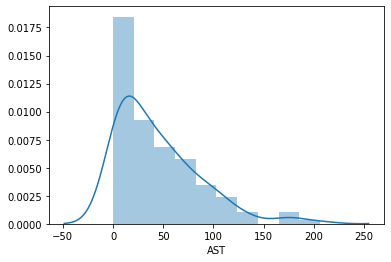

In [16]:
#your code here

# ??? t-distribution of both tests???

sns.distplot(wnba['AST'])
plt.show()

# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

In [17]:
#your-answer-here

# https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# 
# It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to 
# produce an omnibus test of normality.


In [18]:
# your code here

# H0: sample comes from a population that has normal distribution.
# H1: sample does not come from a population that has normal distribution.

alpha = 0.05
stat, p = stats.normaltest(wnba['Weight'])

if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
print('Statistic: ', st)
print('p-value: ', p)

The null hypothesis cannot be rejected
Statistic:  -2.1499947192482898
p-value:  0.10498487875387273


**What are your comments in regards to the results of the test?**

In [19]:
#your-answer-here

# We cannot reject hypothesis that our sample of WNBA weights comes from a poulation
# with normal distribution.


In [20]:
# https://en.wikipedia.org/wiki/Candace_Parker

wnba[wnba['TD3'] == wnba['TD3'].max()]


,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
28,Candace Parker,LA,F/C,193,79.0,21.208623,US,"April 19, 1986",31,Tennessee,10,29,889,183,383,47.8,40,114,35.1,88,115,76.5,37,205,242,127,43,53,80,494,10,1


In [21]:
# https://en.wikipedia.org/wiki/Jordan_Hooper

wnba[wnba['DD2'] == wnba['DD2'].max()]


,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
69,Jordan Hooper,CHI,F,188,84.0,23.76641,US,"February 20, 1992",25,Nebraska,3,29,833,164,299,54.8,22,49,44.9,117,142,82.4,108,226,334,40,29,46,46,467,17,0


In [22]:
# https://en.wikipedia.org/wiki/Basketball_statistics
# Does playing more minutes mean that you are going to demonstrate better stats?

wnba[wnba['MIN'] == wnba['MIN'].max()]


,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
124,Skylar Diggins-Smith,DAL,G,175,66.0,21.55102,US,"February 8, 1990",27,Notre Dame,4,30,1018,167,394,42.4,43,119,36.1,168,186,90.3,21,86,107,173,38,24,83,545,1,0


In [32]:
wnba['FGM/MIN'] = wnba['FGM']/wnba['MIN']
wnba['AST/TO'] = wnba['AST']/wnba['TO']
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,FGM/MIN,AST/TO
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0,0.173410,1.000000
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0,0.095037,1.800000
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0,0.132901,3.250000
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0,0.104022,1.710526
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0,0.116788,0.857143


In [24]:
# Is the average of [insert your stats] for WNBA players higher than those of 
# Candace Parker? 
# (use inferential statistics)

# Stats to check this hypothesis for:
# Height, Weight, Experience (probably years played), Games played, MIN, FG%, 3P%, FT%, 
# OREB,  DREB, REB, AST, STL, BLK, TO, PTS, DD2, TD3


In [33]:
statlist = ['Age', 'Height', 'Weight', 'BMI', 'AST/TO', 'MIN', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PTS', 'DD2', 'TD3']

wnba[wnba['Name'] == 'Candace Parker']


,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,FGM/MIN,AST/TO
28,Candace Parker,LA,F/C,193,79.0,21.208623,US,"April 19, 1986",31,Tennessee,10,29,889,183,383,47.8,40,114,35.1,88,115,76.5,37,205,242,127,43,53,80,494,10,1,0.205849,1.5875


In [30]:
# ONE SIDED Hypothesis testing
# The null hypothesis is the measurement that the analyst hopes to reject.
# The alternative hypothesis is the claim made by the analyst.

alpha = 0.05

for i in statlist:
    print(f"Ho: the average {i} at WNBA =< {i} of Candace Parker")
    print(f"H1: the average {i} at WNBA > {i} of Candace Parker")
    st, p_two_tailed = ttest_1samp(wnba[i], wnba.loc[28].at[i])
    p_one_tailed = p_two_tailed/2
    if (p_one_tailed < alpha) and (st > 0):
        print(f"Null hypothesis about {i} rejected")
    else:
        print(f"Null hypothesis about {i} can't be rejected")
    print('Statistic: ', st)
    print('p-value: ', p_one_tailed, '\n')


Ho: the average Age at WNBA =< Age of Candace Parker
H1: the average Age at WNBA > Age of Candace Parker
Null hypothesis about Age can't be rejected
Statistic:  -12.631726485375506
p-value:  3.062924938362945e-25 

Ho: the average Height at WNBA =< Height of Candace Parker
H1: the average Height at WNBA > Height of Candace Parker
Null hypothesis about Height can't be rejected
Statistic:  -11.490576171323632
p-value:  2.798031272444064e-22 

Ho: the average Weight at WNBA =< Weight of Candace Parker
H1: the average Weight at WNBA > Weight of Candace Parker
Null hypothesis about Weight can't be rejected
Statistic:  -0.02289485992237602
p-value:  0.49088325455762494 

Ho: the average BMI at WNBA =< BMI of Candace Parker
H1: the average BMI at WNBA > BMI of Candace Parker
Null hypothesis about BMI rejected
Statistic:  10.818227088152868
p-value:  1.5500509206048222e-20 

Ho: the average MIN at WNBA =< MIN of Candace Parker
H1: the average MIN at WNBA > MIN of Candace Parker
Null hypothesis

In [34]:
alpha = 0.05

# TWO SIDED hypothesis testing

for i in statlist:
    print(f"Ho: the average {i} at WNBA = {i} of Candace Parker")
    print(f"H1: the average {i} at WNBA != {i} of Candace Parker")
    st, p_two_tailed = ttest_1samp(wnba[i], wnba.loc[28].at[i])
#     p_one_tailed = p_two_tailed/2
    if p_two_tailed < alpha:
        print(f"Null hypothesis about {i} rejected")
    else:
        print(f"Null hypothesis about {i} can't be rejected")
    print('Statistic: ', st)
    print('p-value: ', p_two_tailed, '\n')


Ho: the average Age at WNBA = Age of Candace Parker
H1: the average Age at WNBA != Age of Candace Parker
Null hypothesis about Age rejected
Statistic:  -12.631726485375506
p-value:  6.12584987672589e-25 

Ho: the average Height at WNBA = Height of Candace Parker
H1: the average Height at WNBA != Height of Candace Parker
Null hypothesis about Height rejected
Statistic:  -11.490576171323632
p-value:  5.596062544888128e-22 

Ho: the average Weight at WNBA = Weight of Candace Parker
H1: the average Weight at WNBA != Weight of Candace Parker
Null hypothesis about Weight can't be rejected
Statistic:  -0.02289485992237602
p-value:  0.9817665091152499 

Ho: the average BMI at WNBA = BMI of Candace Parker
H1: the average BMI at WNBA != BMI of Candace Parker
Null hypothesis about BMI rejected
Statistic:  10.818227088152868
p-value:  3.1001018412096444e-20 

Ho: the average AST/TO at WNBA = AST/TO of Candace Parker
H1: the average AST/TO at WNBA != AST/TO of Candace Parker
Null hypothesis about A